# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [11]:
config_file = "../config_sim_GAM-10000.ini"
data_str = "20240421"  # e.g. "20240413"


In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_GAM-10000.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,noise_sd,metric,x_1,x_2,x_3,x_4,x_5
0,0,GAM_20240421_1_10000_0.1,GAM,1,10000,0.1,mean_squared_error,0.005919,0.004714,0.012148,0.009978,0.011612
1,0,GAM_20240421_1_10000_0.5,GAM,1,10000,0.5,mean_squared_error,0.005867,0.004760,0.012286,0.009787,0.011523
2,0,GAM_20240421_2_10000_0.1,GAM,2,10000,0.1,mean_squared_error,0.000444,0.000231,0.000509,0.000009,0.001734
3,0,GAM_20240421_2_10000_0.5,GAM,2,10000,0.5,mean_squared_error,0.000698,0.000564,0.001274,0.000042,0.001901
4,0,GAM_20240421_3_10000_0.1,GAM,3,10000,0.1,mean_squared_error,0.000168,0.006268,0.000637,0.002083,0.003526
5,0,GAM_20240421_3_10000_0.5,GAM,3,10000,0.5,mean_squared_error,0.000233,0.006013,0.000914,0.001725,0.002998
6,0,GAM_20240421_4_10000_0.1,GAM,4,10000,0.1,mean_squared_error,0.000135,0.000394,0.000053,0.003648,0.000515
7,0,GAM_20240421_4_10000_0.5,GAM,4,10000,0.5,mean_squared_error,0.000602,0.000470,0.000923,0.003450,0.000453
8,0,GAM_20240421_5_10000_0.1,GAM,5,10000,0.1,mean_squared_error,0.004412,0.003759,0.002838,0.000802,0.005974
9,0,GAM_20240421_5_10000_0.5,GAM,5,10000,0.5,mean_squared_error,0.004703,0.004143,0.003516,0.000955,0.006325


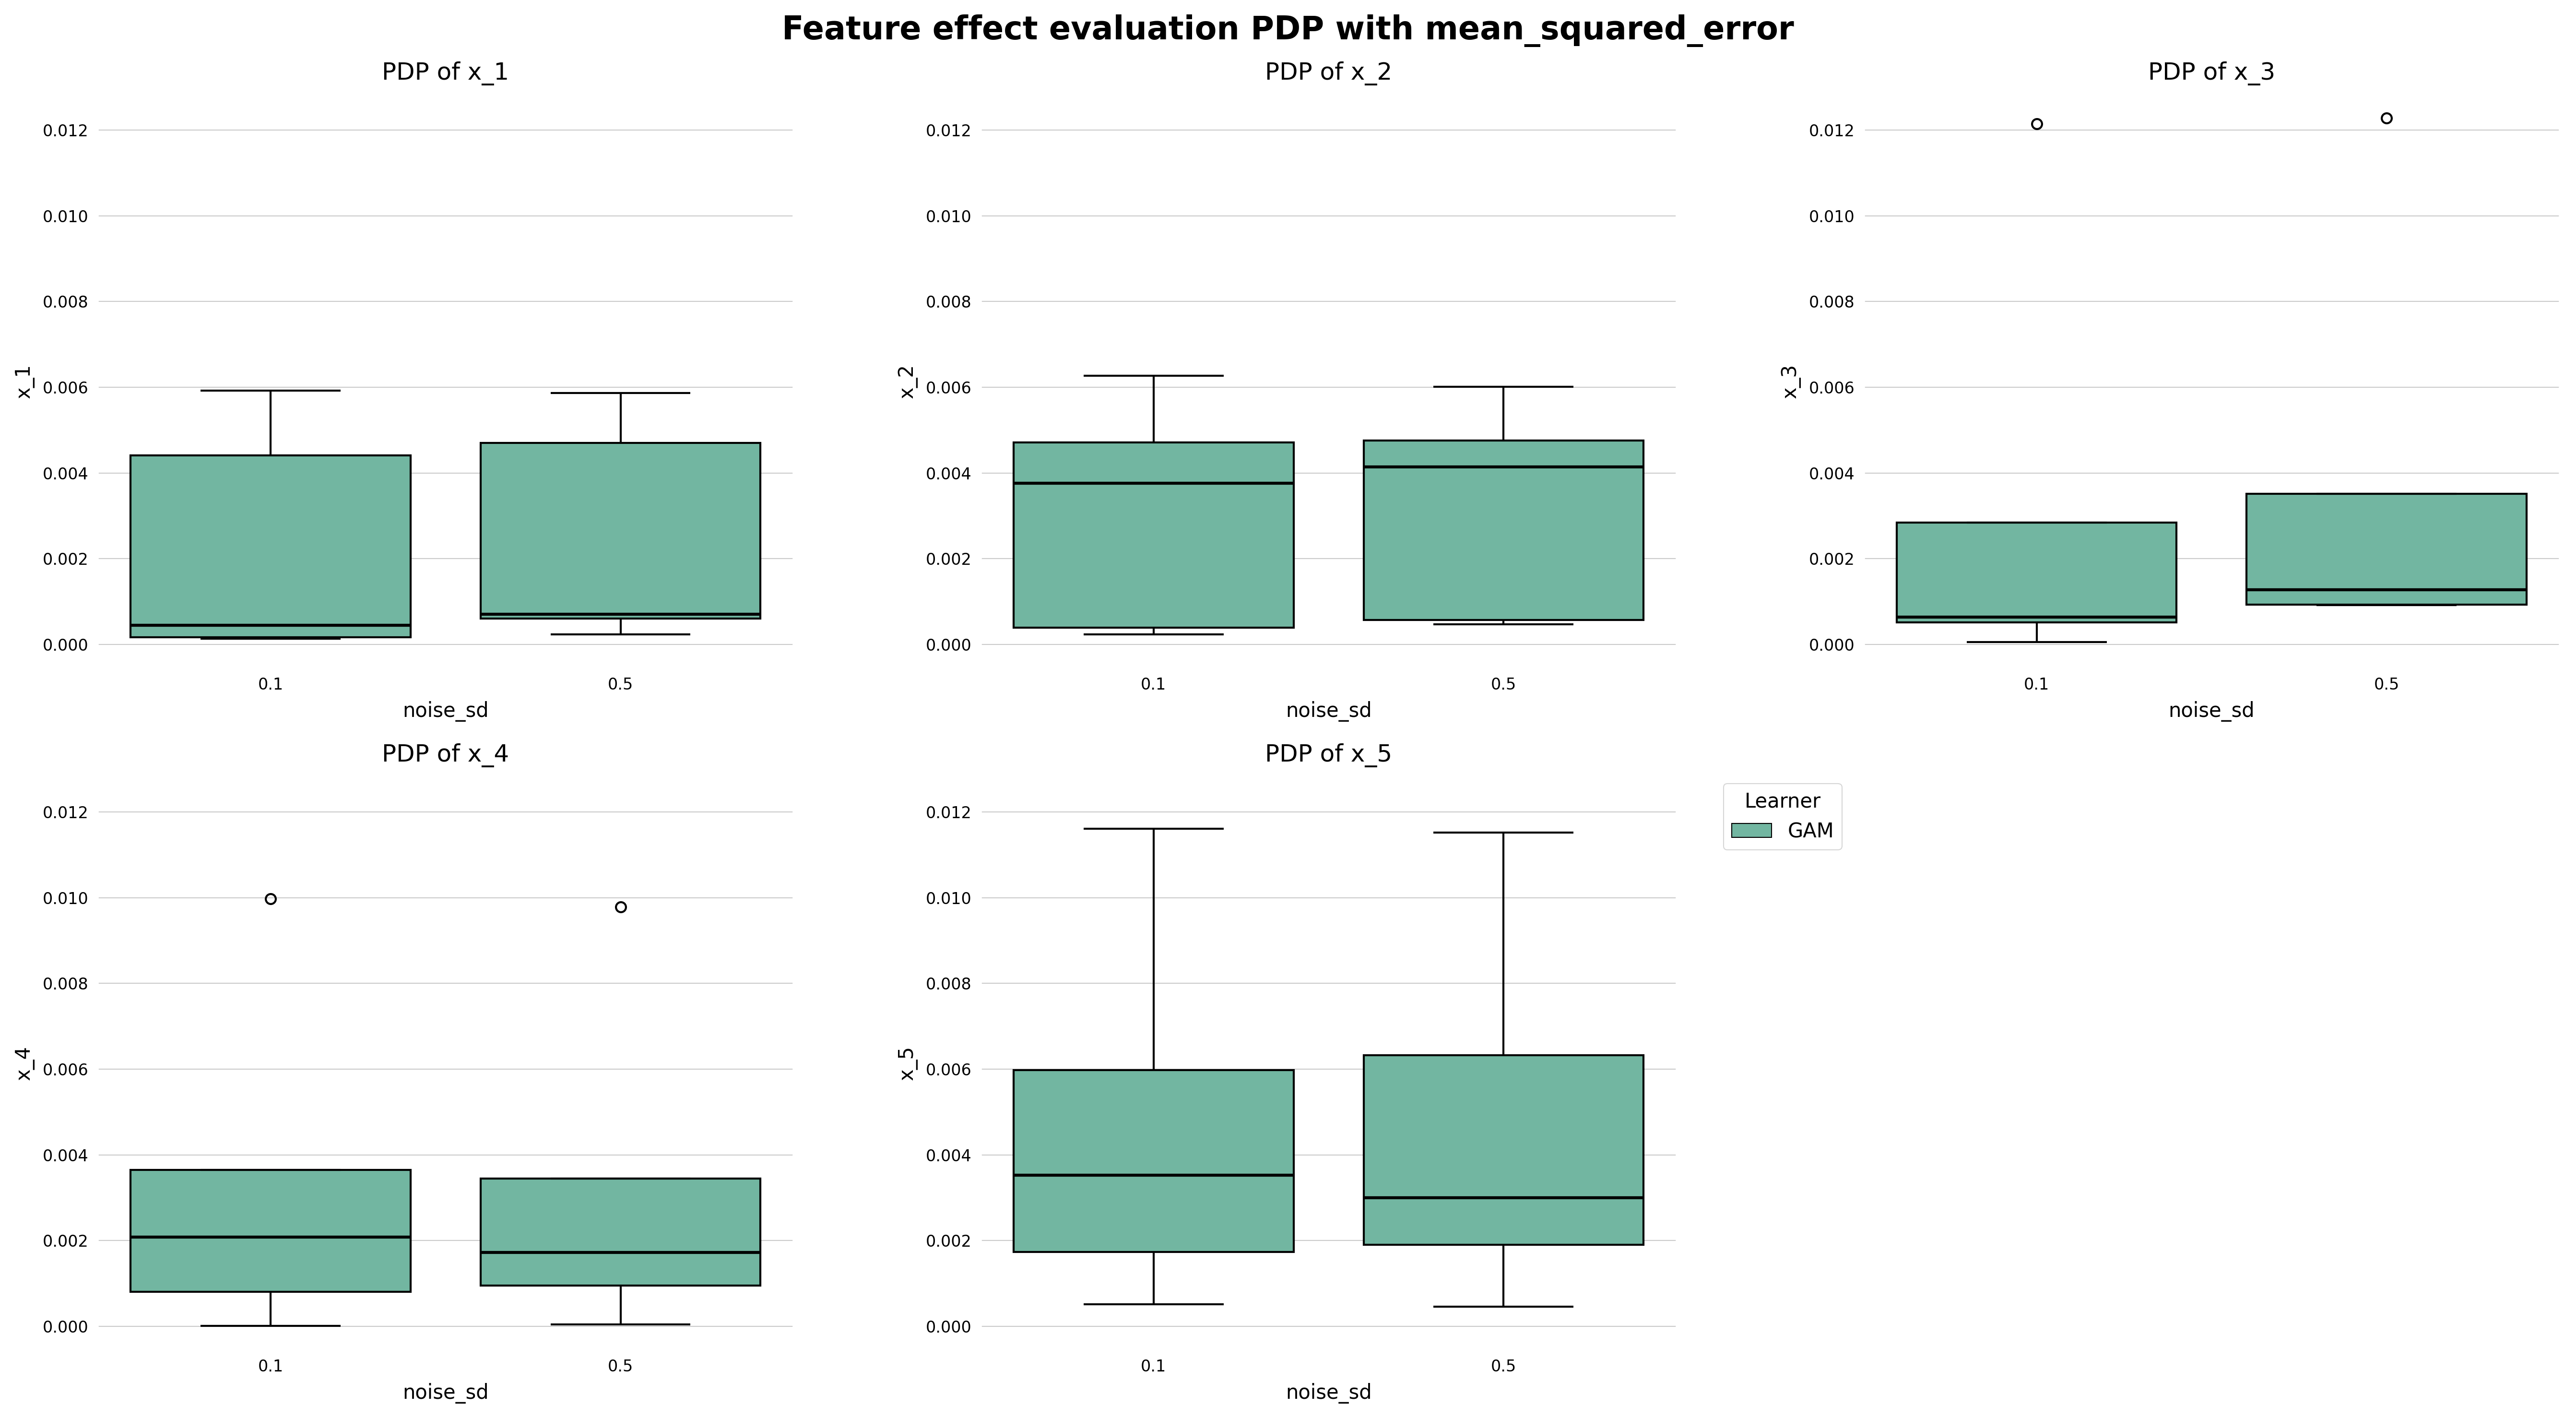

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

In [20]:
# set up of example
sim_no = 3
n_train = 10000
noise_sd = 0.1

In [21]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 3 with n_train=10000 and noise_sd=0.1)

In [22]:
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, seed=1)
# init groundtruth
groundtruth = Groundtruth()
# load models
# rf = load(f'../models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# xgb = load(f'../models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# tree = load(f'../models/DecisionTreeRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# svm = load(f'../models/SVR_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
# elasticnet = load(f'../models/ElasticNet_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
gam = load(f'../models/GAM_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')

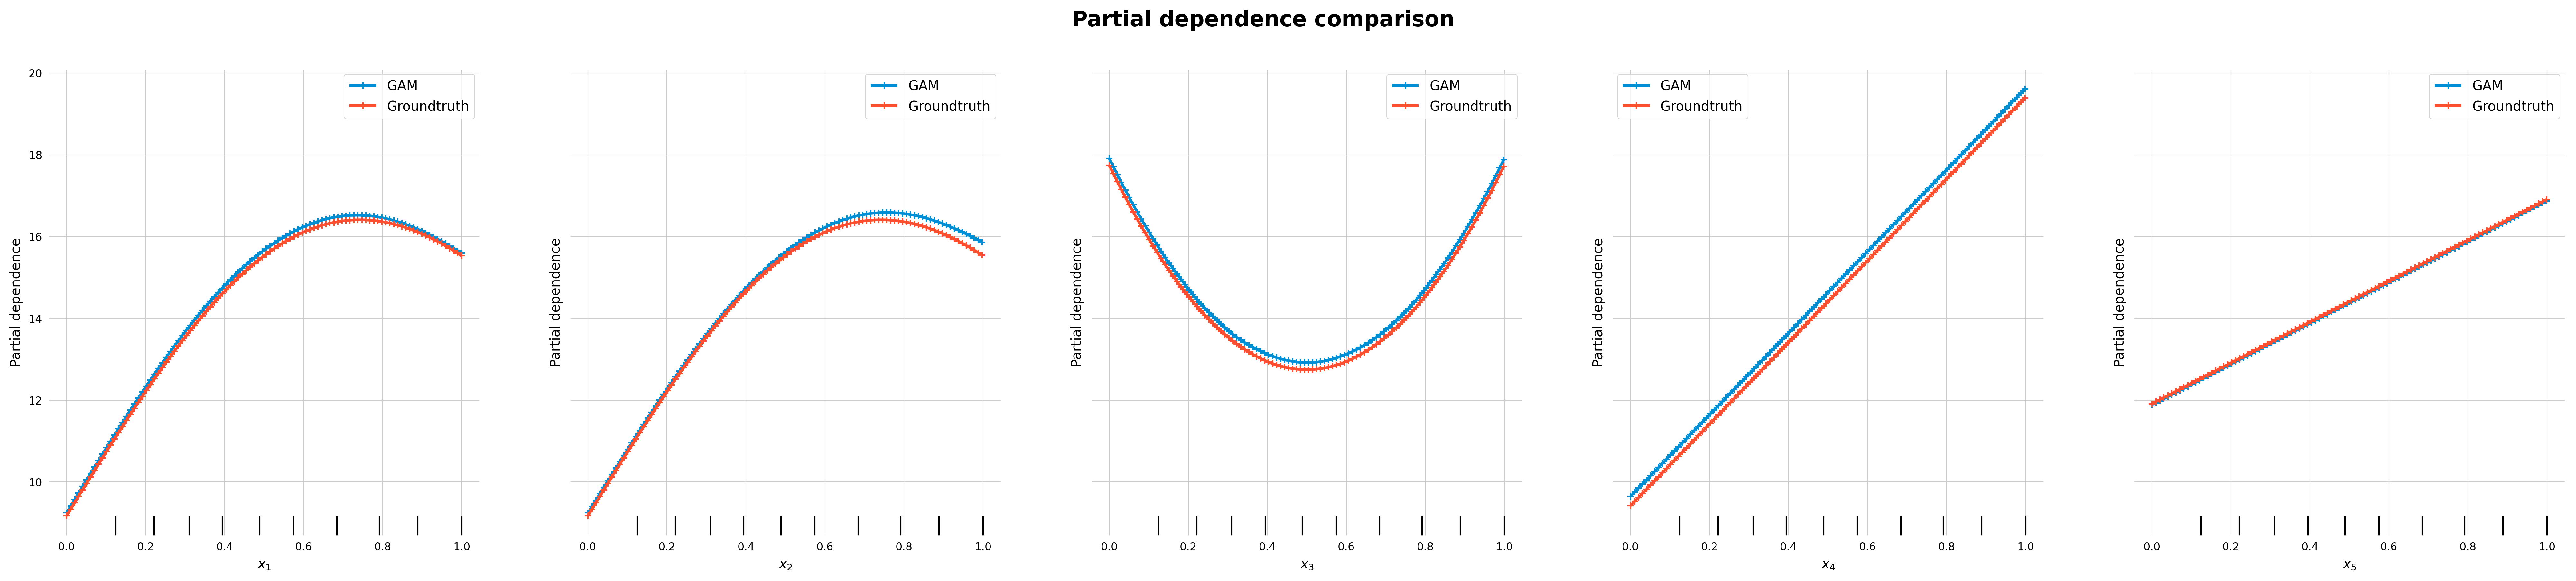

In [23]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [ ]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

In [ ]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

In [ ]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

In [ ]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);